In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer



In [85]:
df = pd.read_csv('./Fin_Total_0823.csv')
df

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,13,3,420001,0,0,1,1,1,1,0
1,3,주부,3600,4900,4,1,34.0,0,0,0,...,121,0,0,0,0,0,4,0,1,0
2,5,공무원,4800,4800,4,1,14.0,0,0,0,...,97,0,0,0,0,0,1,1,0,1
3,6,3차산업 종사자,4400,7700,2,2,0.0,3300,0,0,...,121,0,0,0,0,0,4,0,1,0
4,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,121,1,6001,0,0,1,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89861,102248,자영업,5500,12900,3,3,34.0,0,0,0,...,121,0,0,0,0,1,4,0,1,0
89862,102249,운전직,4600,9800,5,2,19.0,5200,0,0,...,121,0,0,0,0,0,1,1,1,0
89863,102250,자영업,4800,10400,4,2,14.0,5600,0,0,...,121,0,0,0,0,1,1,1,1,0
89864,102251,사무직,4200,4200,1,1,0.0,0,0,0,...,121,0,0,0,0,0,4,0,0,0


In [86]:
df.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
# Category :
# Pos_loan : 신용대출 가능 0 1
# Yn_obdu : 연체 0 1

In [87]:
from sklearn.model_selection import train_test_split


df_dummy = pd.get_dummies(df)

df_dummy

,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,...,OCCP_NAME_G_기업/단체 임원,OCCP_NAME_G_단순 노무직,OCCP_NAME_G_단순 사무직,OCCP_NAME_G_사무직,OCCP_NAME_G_예체능계 종사자,OCCP_NAME_G_운전직,OCCP_NAME_G_자영업,OCCP_NAME_G_전문직,OCCP_NAME_G_주부,OCCP_NAME_G_학생
0,5400,7700,4,1,24.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3600,4900,4,1,34.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4800,4800,4,1,14.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4400,7700,2,2,0.0,3300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3600,7700,5,3,19.0,4400,1,200106,4000000,4000000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89861,5500,12900,3,3,34.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
89862,4600,9800,5,2,19.0,5200,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
89863,4800,10400,4,2,14.0,5600,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
89864,4200,4200,1,1,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, random_state= 1234)
kmeans.fit(df_dummy)

KMeans(n_clusters=3, random_state=1234)

In [30]:
df_dummy['label'] = kmeans.labels_
df_dummy.groupby('label').mean()

,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,...,OCCP_NAME_G_기업/단체 임원,OCCP_NAME_G_단순 노무직,OCCP_NAME_G_단순 사무직,OCCP_NAME_G_사무직,OCCP_NAME_G_예체능계 종사자,OCCP_NAME_G_운전직,OCCP_NAME_G_자영업,OCCP_NAME_G_전문직,OCCP_NAME_G_주부,OCCP_NAME_G_학생
label,,,,,,,,,,,,,,,,,,,,,
0,4858.688067,8671.842289,3.665387,1.980286,18.194522,2532.955338,0.230984,25655.573098,2.727495e+06,1.956909e+06,...,0.022680,0.006281,0.040998,0.155792,0.008548,0.013782,0.148814,0.047627,0.267620,0.028960
1,5409.223301,11083.980583,3.694175,2.480583,16.014563,2797.572816,0.092233,12654.868932,2.082524e+06,9.417476e+05,...,0.043689,0.000000,0.019417,0.266990,0.014563,0.000000,0.203883,0.038835,0.223301,0.038835
2,4278.225384,7031.082595,2.726539,1.355579,11.877383,1714.638738,0.163879,19989.278596,1.133615e+06,8.330950e+05,...,0.009615,0.008758,0.043954,0.169205,0.009854,0.022186,0.094557,0.053677,0.283183,0.038688


In [31]:
df_dummy.groupby('label').count()

,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,...,OCCP_NAME_G_기업/단체 임원,OCCP_NAME_G_단순 노무직,OCCP_NAME_G_단순 사무직,OCCP_NAME_G_사무직,OCCP_NAME_G_예체능계 종사자,OCCP_NAME_G_운전직,OCCP_NAME_G_자영업,OCCP_NAME_G_전문직,OCCP_NAME_G_주부,OCCP_NAME_G_학생
label,,,,,,,,,,,,,,,,,,,,,
0,5732,5732,5732,5732,5732,5732,5732,5732,5732,5732,...,5732,5732,5732,5732,5732,5732,5732,5732,5732,5732
1,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
2,83928,83928,83928,83928,83928,83928,83928,83928,83928,83928,...,83928,83928,83928,83928,83928,83928,83928,83928,83928,83928


In [36]:
df_dummy['AGE'].value_counts()

45    17319
50    16020
55    13736
40    13517
35    10974
60     8111
30     4917
65     2702
25     2052
70      305
20      213
Name: AGE, dtype: int64

In [39]:
df_dummy.iloc[0]

CUST_JOB_INCM      5400.0
HSHD_INFR_INCM     7700.0
ACTL_FMLY_NUM         4.0
CUST_FMLY_NUM         1.0
LAST_CHLD_AGE        24.0
                    ...  
OCCP_NAME_G_자영업       0.0
OCCP_NAME_G_전문직       0.0
OCCP_NAME_G_주부        0.0
OCCP_NAME_G_학생        0.0
label                 2.0
Name: 0, Length: 74, dtype: float64

In [53]:
_list = []
for i in range(len(df_dummy)):
    if df_dummy.loc[i,"AGE"] in [20,25,30,35]:
        _list.append(i)
mz = df_dummy.iloc[_list]

In [58]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, random_state= 1234)
kmeans.fit(mz)

KMeans(n_clusters=3, random_state=1234)

In [46]:
mz['label'] = kmeans.labels_
mz.groupby('label').mean()

,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,...,OCCP_NAME_G_기업/단체 임원,OCCP_NAME_G_단순 노무직,OCCP_NAME_G_단순 사무직,OCCP_NAME_G_사무직,OCCP_NAME_G_예체능계 종사자,OCCP_NAME_G_운전직,OCCP_NAME_G_자영업,OCCP_NAME_G_전문직,OCCP_NAME_G_주부,OCCP_NAME_G_학생
label,,,,,,,,,,,,,,,,,,,,,
0,4368.513120,7920.991254,3.177843,2.236152,4.588921,1201.749271,0.072886,8207.507289,1.154519e+06,865889.212828,...,0.014577,0.002915,0.064140,0.218659,0.017493,0.002915,0.084548,0.093294,0.169096,0.110787
1,3872.144006,5922.425583,2.269308,1.310003,3.560003,809.010459,0.052092,6605.772191,3.615581e+05,215741.485653,...,0.006637,0.005564,0.063891,0.193752,0.013878,0.010459,0.074149,0.077233,0.198042,0.121413
2,4308.108108,9472.972973,3.594595,2.810811,5.081081,1354.054054,0.000000,0.000000,0.000000e+00,0.000000,...,0.027027,0.000000,0.054054,0.324324,0.000000,0.000000,0.108108,0.027027,0.189189,0.162162
3,5872.727273,11372.727273,1.818182,1.454545,8.909091,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.363636,0.000000,0.000000,0.090909,0.000000,0.181818,0.000000
4,3998.666199,6683.397683,3.106353,2.060723,4.506845,1160.336960,0.091962,10511.173745,9.413829e+05,642681.642682,...,0.004563,0.006318,0.065988,0.197964,0.015093,0.007722,0.075465,0.092664,0.169533,0.123552


In [59]:
labels = kmeans.fit_predict(df_dummy)
silhouette_score(df_dummy, labels)

silhouette_score(df_dummy, labels)

0.7572758180707412

In [69]:
#X_feature와 클러스터 개수를 입력하면, KMeans 알고리즘 수행 후, visaulize

import matplotlib.cm as cm

def visualize_silhouette(cluster_lists, X_features) :
    
    #클러스터링할 군집의 개수를 리스트로 받아서, 각 개숫별로 클러스터링을 하고, 실루엣 계수를 구함
    n_cols = len(cluster_lists)
    
    fig, axs = plt.subplots(figsize = (4*n_cols, 4), nrows = 1, ncols = n_cols)
    
    for ind, n_cluster in enumerate(cluster_lists) :
        
        clusterer = KMeans(n_clusters = n_cluster, max_iter = 500, random_state = 0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n' \
                          'Silhouette Score : ' + str(round(sil_avg,3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

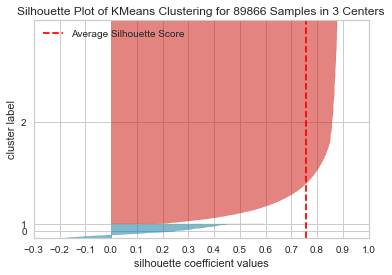

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 89866 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
visualizer_2 = SilhouetteVisualizer(kmeans, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(df_dummy)      
visualizer_2.show()

In [43]:
mz['label'] = kmeans.labels_
mz.groupby('label').mean()

,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,...,OCCP_NAME_G_기업/단체 임원,OCCP_NAME_G_단순 노무직,OCCP_NAME_G_단순 사무직,OCCP_NAME_G_사무직,OCCP_NAME_G_예체능계 종사자,OCCP_NAME_G_운전직,OCCP_NAME_G_자영업,OCCP_NAME_G_전문직,OCCP_NAME_G_주부,OCCP_NAME_G_학생
label,,,,,,,,,,,,,,,,,,,,,
0,3883.841247,6001.742263,2.367175,1.394460,3.689287,852.492322,0.057465,7148.722655,4.290102e+05,259803.921569,...,0.006378,0.005788,0.063548,0.193716,0.014292,0.009922,0.074002,0.079613,0.194366,0.121368
1,4155.017007,7206.887755,3.153061,2.182823,4.292517,1148.639456,0.077381,8716.866497,1.026361e+06,805272.108844,...,0.007653,0.003401,0.073980,0.211735,0.011905,0.009354,0.082483,0.085034,0.173469,0.124150
2,4666.666667,9908.333333,3.187500,2.500000,5.958333,1043.750000,0.000000,0.000000,0.000000e+00,0.000000,...,0.020833,0.000000,0.041667,0.333333,0.000000,0.000000,0.104167,0.020833,0.187500,0.125000


In [44]:
mz.describe()

,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,...,OCCP_NAME_G_단순 노무직,OCCP_NAME_G_단순 사무직,OCCP_NAME_G_사무직,OCCP_NAME_G_예체능계 종사자,OCCP_NAME_G_운전직,OCCP_NAME_G_자영업,OCCP_NAME_G_전문직,OCCP_NAME_G_주부,OCCP_NAME_G_학생,label
count,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000,1.815600e+04,1.815600e+04,...,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000,18156.000000
mean,3903.475435,6090.129985,2.420247,1.448447,3.734358,872.179996,0.058603,7231.394966,4.665675e+05,2.944481e+05,...,0.005618,0.064166,0.195252,0.014100,0.009859,0.074631,0.079808,0.192994,0.121558,0.070059
std,827.860063,2506.806282,1.161854,0.641567,8.768688,1868.621852,0.389595,37439.905870,3.402032e+06,2.734823e+06,...,0.074744,0.245055,0.396406,0.117907,0.098805,0.262802,0.271004,0.394659,0.326783,0.265410
min,2400.000000,1600.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,4100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3600.000000,5500.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4100.000000,7600.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10000.000000,20000.000000,8.000000,5.000000,60.000000,10000.000000,11.000000,201604.000000,1.010000e+08,1.010000e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [62]:
mz_scaled = StandardScaler().fit_transform(mz)

In [66]:
labels = kmeans.fit_predict(mz_scaled)
silhouette_score(mz_scaled, labels)

0.1989505577856884

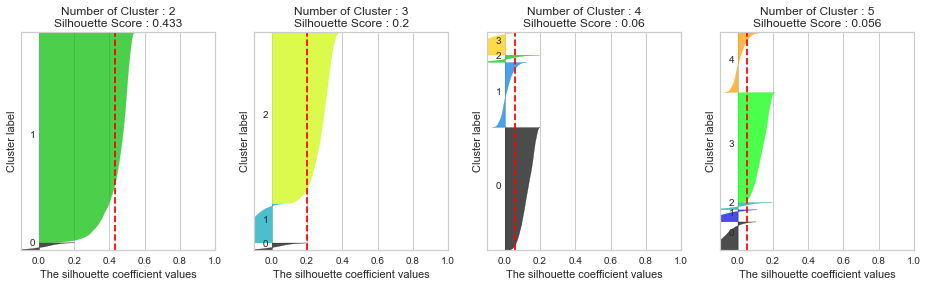

In [70]:
visualize_silhouette([2,3,4,5], mz_scaled)

In [79]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=6)
mz_pca = pca.fit_transform(mz)


In [80]:
df = pd.DataFrame()
df['PrinNo'] = [l for l in range(1,7)]
df['E'] = pca.explained_variance_
df['ER'] = pca.explained_variance_ratio_
df['CumE'] = np.cumsum(pca.explained_variance_ratio_)
df.round(3)

,PrinNo,E,ER,CumE
0,1,4.637301e+15,0.844,0.844
1,2,6.167329e+14,0.112,0.956
2,3,1.953242e+14,0.036,0.991
3,4,2.362822e+13,0.004,0.996
4,5,1.576660e+13,0.003,0.998
5,6,7.101680e+12,0.001,1.000


In [72]:
labels = kmeans.fit_predict(mz_pca)
silhouette_score(mz_pca, labels)

0.7862985089654546

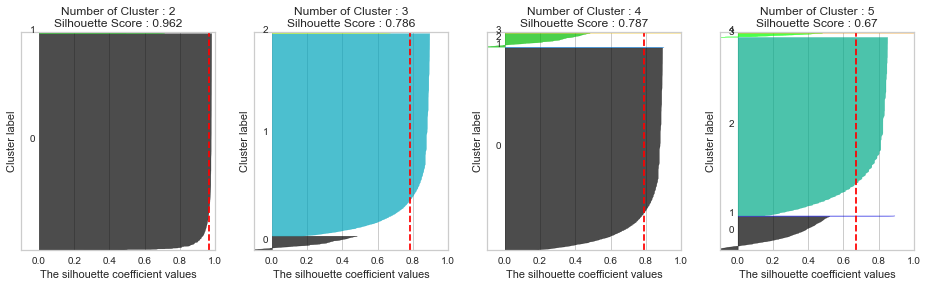

In [73]:
visualize_silhouette([2,3,4,5], mz_pca)

In [74]:
mz_p_scaled = StandardScaler().fit_transform(mz_pca)


In [77]:
labels = kmeans.fit_predict(mz_p_scaled)
silhouette_score(mz_p_scaled, labels)

0.9533540773493892

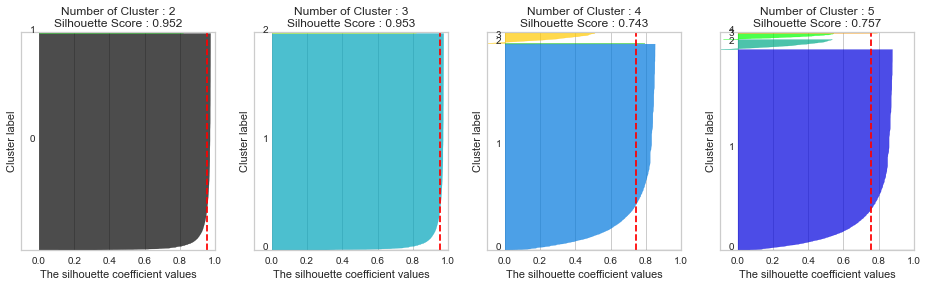

In [78]:
visualize_silhouette([2,3,4,5], mz_p_scaled)

In [81]:
def visualize_silhouette_sklearn(range_n_clusters, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title('Number of Cluster : '+ str(n_clusters)+'\n' \
                              'Silhouette Score :' + str(round(silhouette_avg,3)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

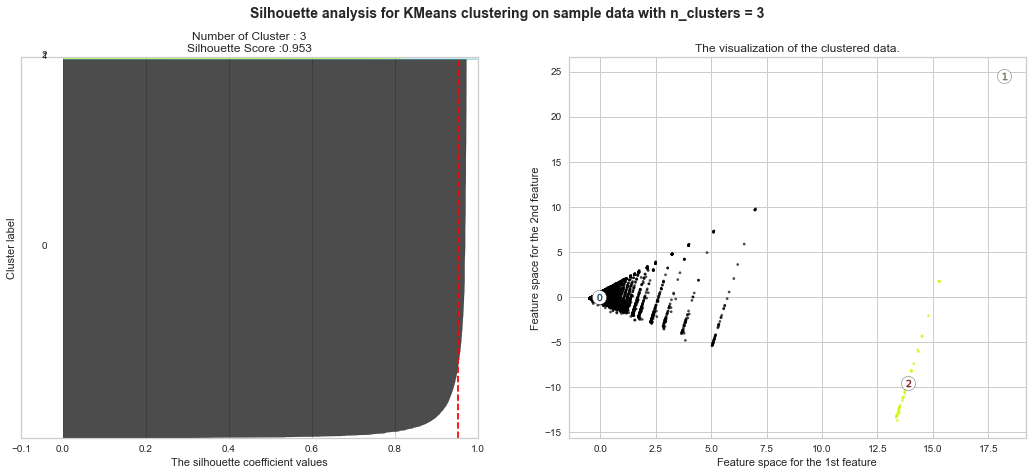

In [83]:
visualize_silhouette_sklearn([3],mz_p_scaled)